# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1H8qsQyuv5fshKJEHPqDtSvQfM1Yxo57m?usp=sharing)

https://wikidocs.net/111476

06-06 로지스틱 회귀 실습

1. 케라스로 구현하는 로지스틱 회귀

독립 변수 데이터를 x
, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y
라고 해봅시다.

이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수 x
로부터 1개의 실수인 y
를 예측하는 맵핑 관계를 가지므로 Dense의 output_dim, input_dim 인자값으로 각각 1을 기재합니다. 시그모이드 함수를 사용할 것이므로 activation의 인자값으로는 sigmoid를 기재해줍니다.

옵티마이저로는 가장 기본적인 경사 하강법인 sgd를 사용하였습니다. 시그모이드 함수를 사용한 이진 분류 문제에 손실 함수로 크로스 엔트로피 함수를 사용할 경우 binary_crossentropy를 기재해주면 됩니다. 에포크는 200으로 합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation = 'sigmoid'))

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

model.fit(x, y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 1s 690ms/step - loss: 0.3626 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 0.3611 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.3596 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 0.3581 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.3566 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 0.3551 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.3536 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.3521 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 0.3507 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 

총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 w
와 b
를 찾아내는 작업을 합니다. 저자의 경우 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하도록 값이 변경된 w
와 b
의 값을 가진 모델을 이용하여 그래프를 그려보겠습니다.

1/1 [==============================] - 0s 21ms/step


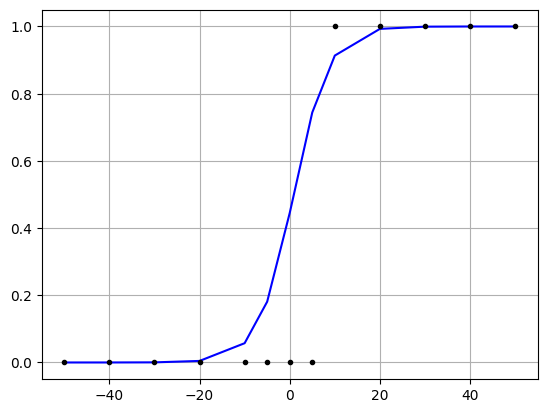

In [4]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.grid()

x의 값이 5와 10사이의 어떤 값일때 y
값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 x
의 값이 5일때는 y
값이 0.5보다 작고, x
의 값이 10일 때는 y
값이 0.5를 넘을 것입니다. 이제 x
의 값이 5보다 작은 값일 때와 x
의 값이 10보다 클 때에 대해서 y
값을 출력해봅시다.

In [5]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

1/1 [==============================] - 0s 123ms/step
[[0.50910896]
 [0.5730246 ]
 [0.63459116]
 [0.6920511 ]
 [0.7188182 ]]
1/1 [==============================] - 0s 93ms/step
[[0.931761  ]
 [0.99446815]
 [0.99957764]
 [0.99996793]
 [1.        ]]
